In [1]:
%matplotlib inline
import numpy as np

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
import matplotlib.pyplot as plt

from linear_regression import  linear_regression
from nearest_neighbour import nearest_neighbour
from regression_forest import regression_forest
from gaussian_process import gaussian_process
from sarcos_data import data_processor
from evaluation import evaluation 

In [2]:
def normalise_data(x_unnormalised):
    b = np.mean(x_unnormalised)
    a = np.std(x_unnormalised)
    x_normalised = (x_unnormalised - b)/a
    
    return x_normalised

In [3]:
def plot_graph_ordered(x,ys, title=''):
    x_squeeze = np.squeeze(x)
    lists = sorted(zip(*[x_squeeze, ys]))
    new_xs,  new_ys = list(zip(*lists))
    plt.plot(new_xs, new_ys)
    plt.title(title)


### Toy Problem

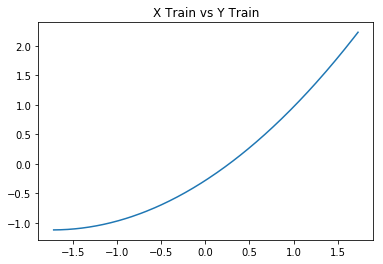

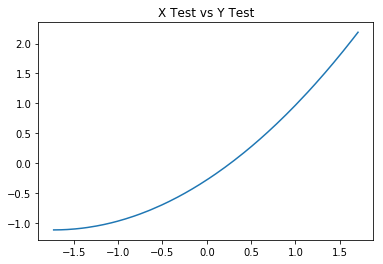

In [4]:
x_ordered = np.linspace(0,10,500)
y_ordered = np.squeeze(np.power(x_ordered, 2))
pair_x_y = np.array(list(zip(x_ordered, y_ordered)))
np.random.shuffle(pair_x_y)
x = np.expand_dims(pair_x_y[:,0], axis = 1)
y = pair_x_y[:,1]

x_norm = normalise_data(x)
y_norm = normalise_data(y)


train_ratio = 0.6
split = int(x.shape[0] * train_ratio)

x_train = x_norm[:split]
y_train = y_norm[:split]

x_test = x_norm[split:]
y_test = y_norm[split:]

plot_graph_ordered(x_train,y_train, 'X Train vs Y Train')
plt.show()
plot_graph_ordered(x_test, y_test, 'X Test vs Y Test')
plt.show()


In [5]:
def plot_data(x, y, style='b+'):
    plt.figure(figsize=[10,8])
    plt.plot(x, y, style)
    plt.grid(True)

In [6]:
data_for_regressors = (x_train, y_train, x_test, y_test)
LR = linear_regression.LinearRegression(*data_for_regressors)
RF = regression_forest.RegressionForest(*data_for_regressors, 10)
NN = nearest_neighbour.NearestNeighbour(*data_for_regressors, 1)
GP = gaussian_process.GaussianProcess(*data_for_regressors)

0.06571250927512486


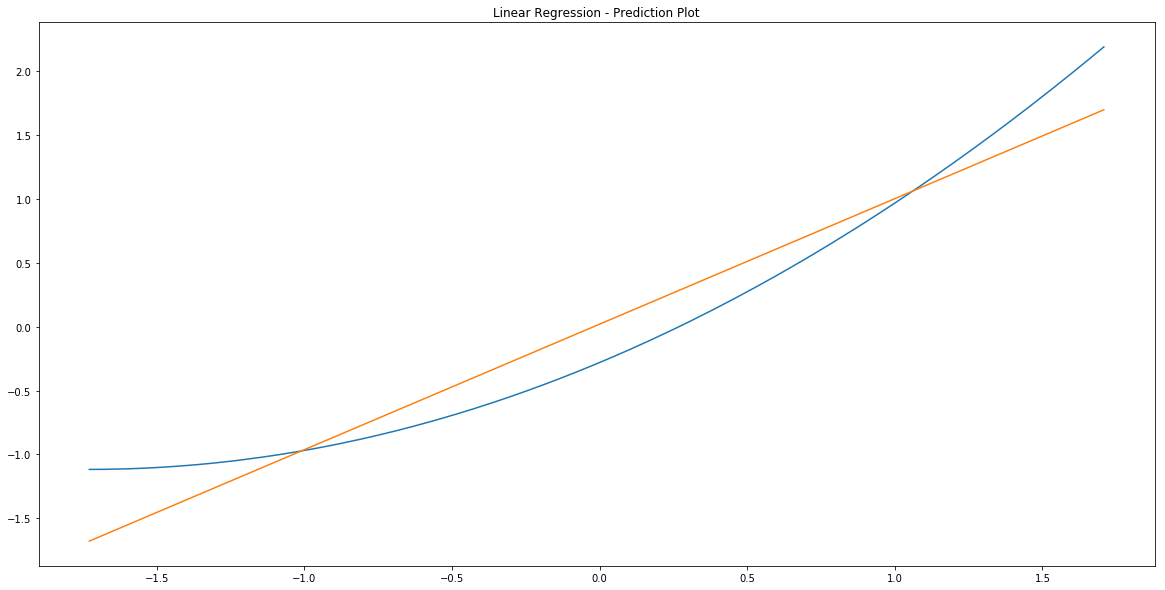

In [7]:
_, _, y_pred, _ = LR.predict(LR.step_size, LR.num_iterations)
print(LR._rmse(y_pred, y_test))
plt.figure(figsize=(20,10))
plot_graph_ordered(x_test, y_test)
plot_graph_ordered(x_test, y_pred, 'Linear Regression - Prediction Plot')
plt.show()

/Users/omarreid/Envs/selerio/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/omarreid/Envs/selerio/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


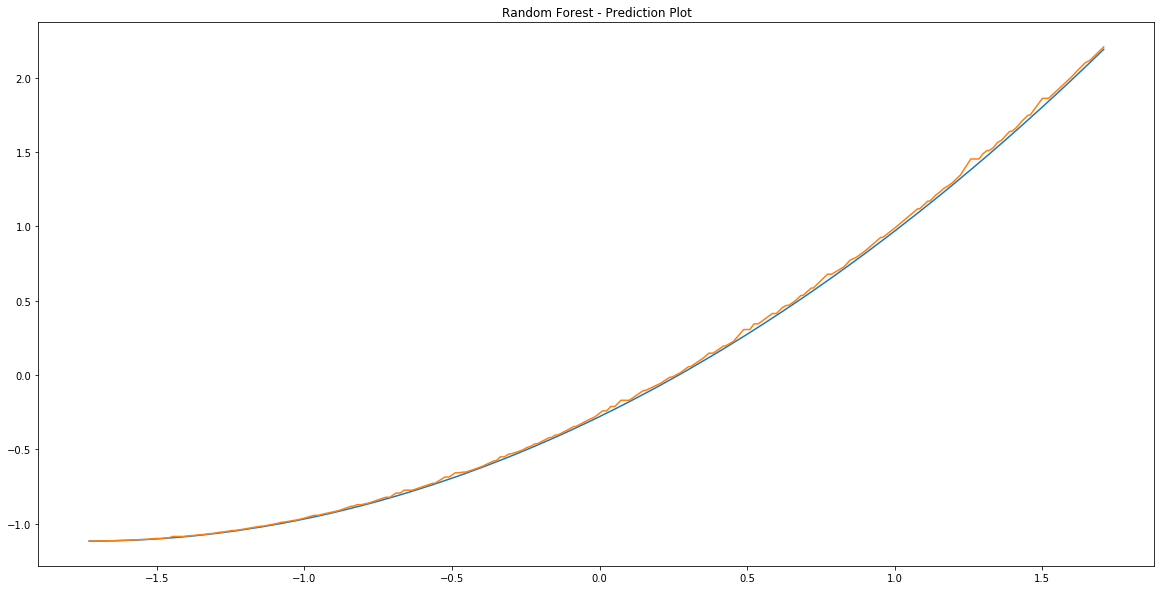

In [8]:
_, _, y_pred, _ = RF.predict(RF.num_estimators, RF.max_tree_depth)
plt.figure(figsize=(20,10))
plot_graph_ordered(x_test, y_test)
plot_graph_ordered(x_test, y_pred, 'Random Forest - Prediction Plot')
plt.show()

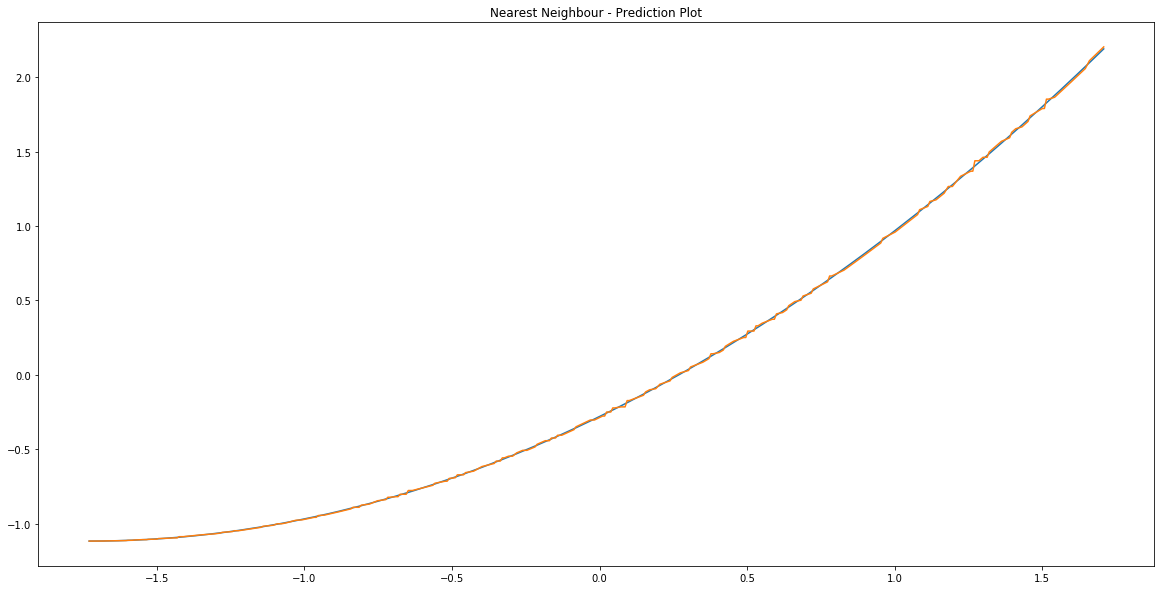

In [9]:
_, _, y_pred, _= NN.predict(NN.k)
plt.figure(figsize=(20,10))
plot_graph_ordered(x_test, y_test)
plot_graph_ordered(x_test, y_pred, 'Nearest Neighbour - Prediction Plot')
plt.show()

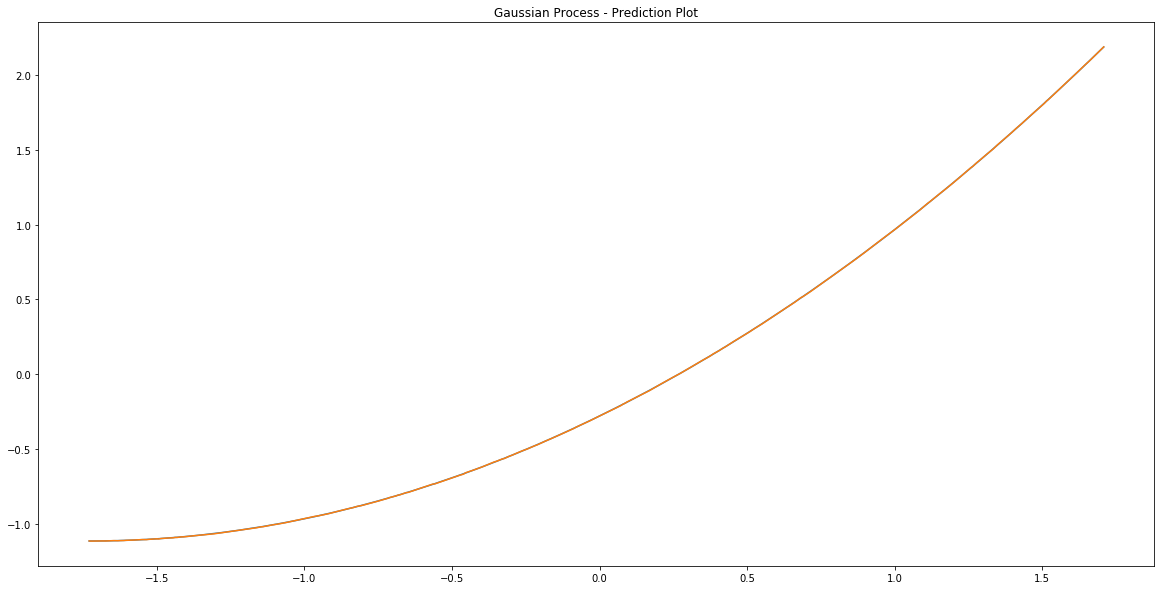

In [10]:
_, _, all_samples, _ = GP.predict(GP.num_samples)
plt.figure(figsize=(20,10))
plot_graph_ordered(x_test, y_test)
plot_graph_ordered(GP.test_x, np.mean(all_samples, 0), 'Gaussian Process - Prediction Plot')

plt.show()

In [11]:
evaluator = evaluation.Evaluator([RF, GP, NN, LR])

In [12]:
# Will find the best model hyperparameters and compute the RMSE, R2 and Time Taken to train and predict
evaluator.run_evaluation()
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(evaluator.results)


Evaluating: RegressionForest


/Users/omarreid/Envs/selerio/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/omarreid/Envs/selerio/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Finished Evaluating: RegressionForest
Evaluating: GaussianProcess
Finished Evaluating: GaussianProcess
Evaluating: NearestNeighbour
Finished Evaluating: NearestNeighbour
Evaluating: LinearRegression
Finished Evaluating: LinearRegression
{   'GaussianProcess': {   'All_H_Values': [   [10, 20, 50, 100, 200, 400],
                                               [   2.8838662001153152e-05,
                                                   5.892017546690243e-06,
                                                   5.818905231827151e-07,
                                                   7.553084202960105e-07,
                                                   8.572253392085464e-07,
                                                   2.888909520242915e-07]],
                           'Analysis': {   'R2': 0.9999996897292905,
                                           'RMSE': 2.888909520242915e-07,
                                           'Time': 6.041682720184326},
                          

In [13]:
def plot_table(cell_data, column_labels, row_labels):
    the_table = plt.table(cellText=cell_data, colLabels=tuple(column_labels), rowLabels=row_labels, loc='center')
    the_table.set_fontsize(20)
    the_table.scale(3, 3) 
    plt.axis('off')
    plt.axis('tight')
    plt.show()

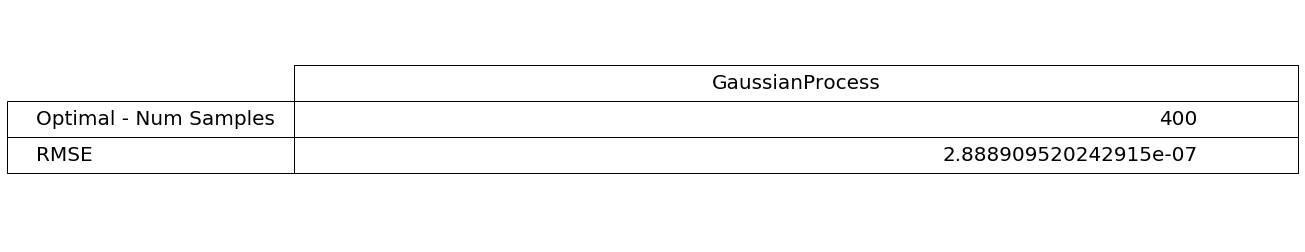

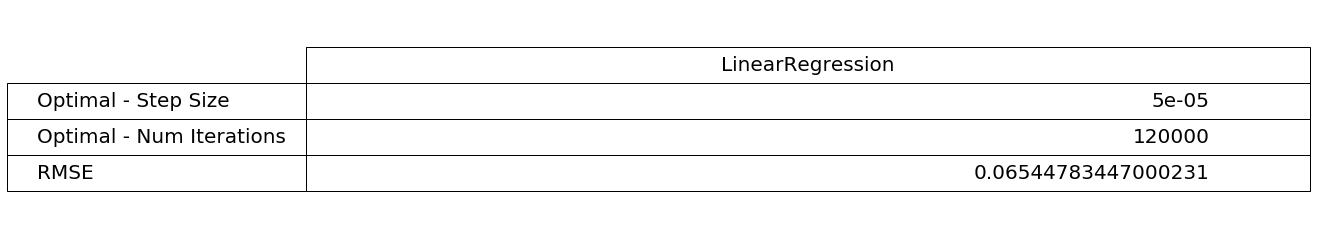

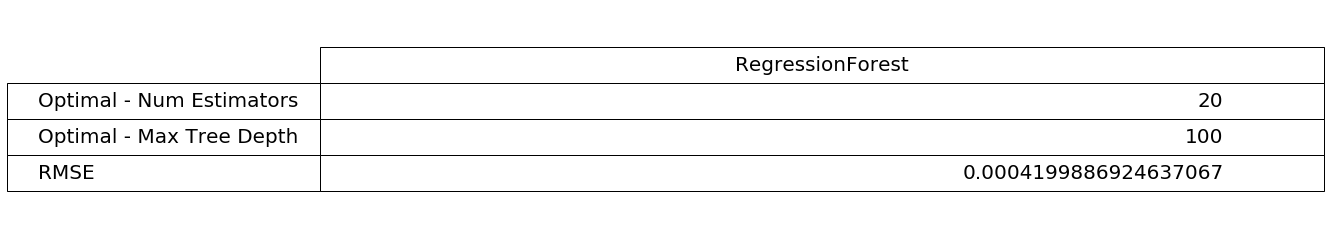

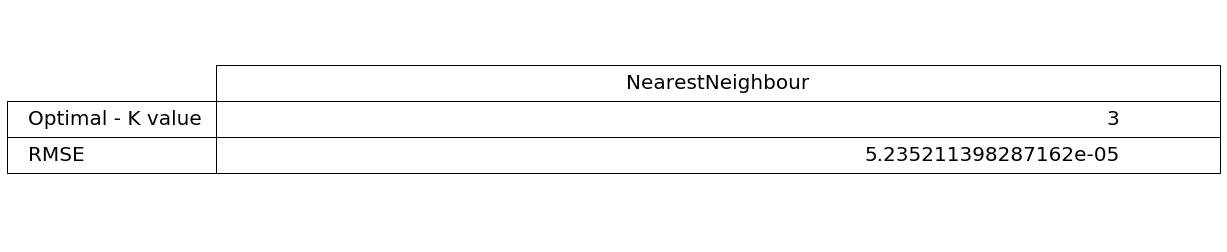

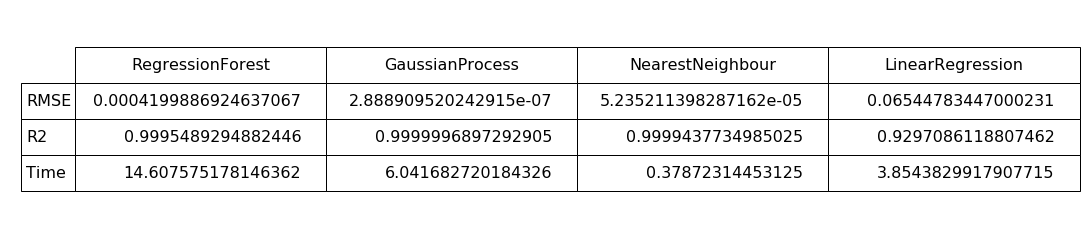

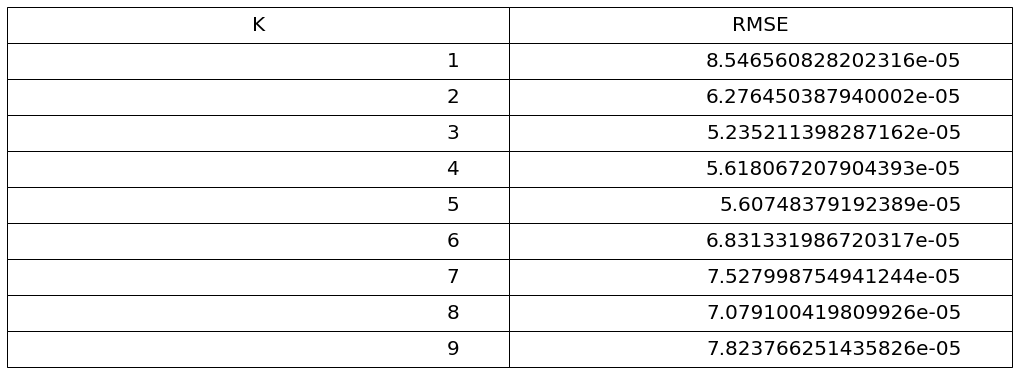

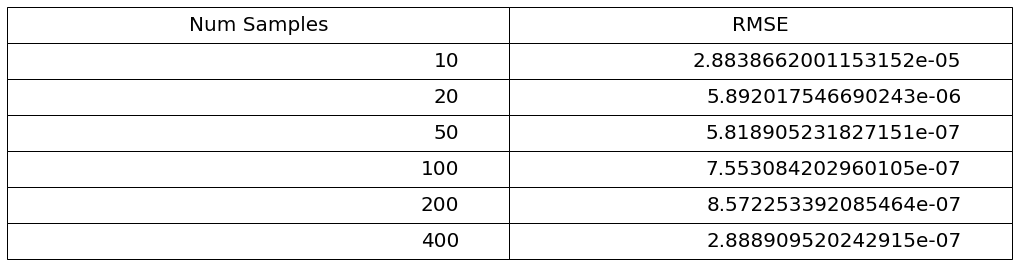

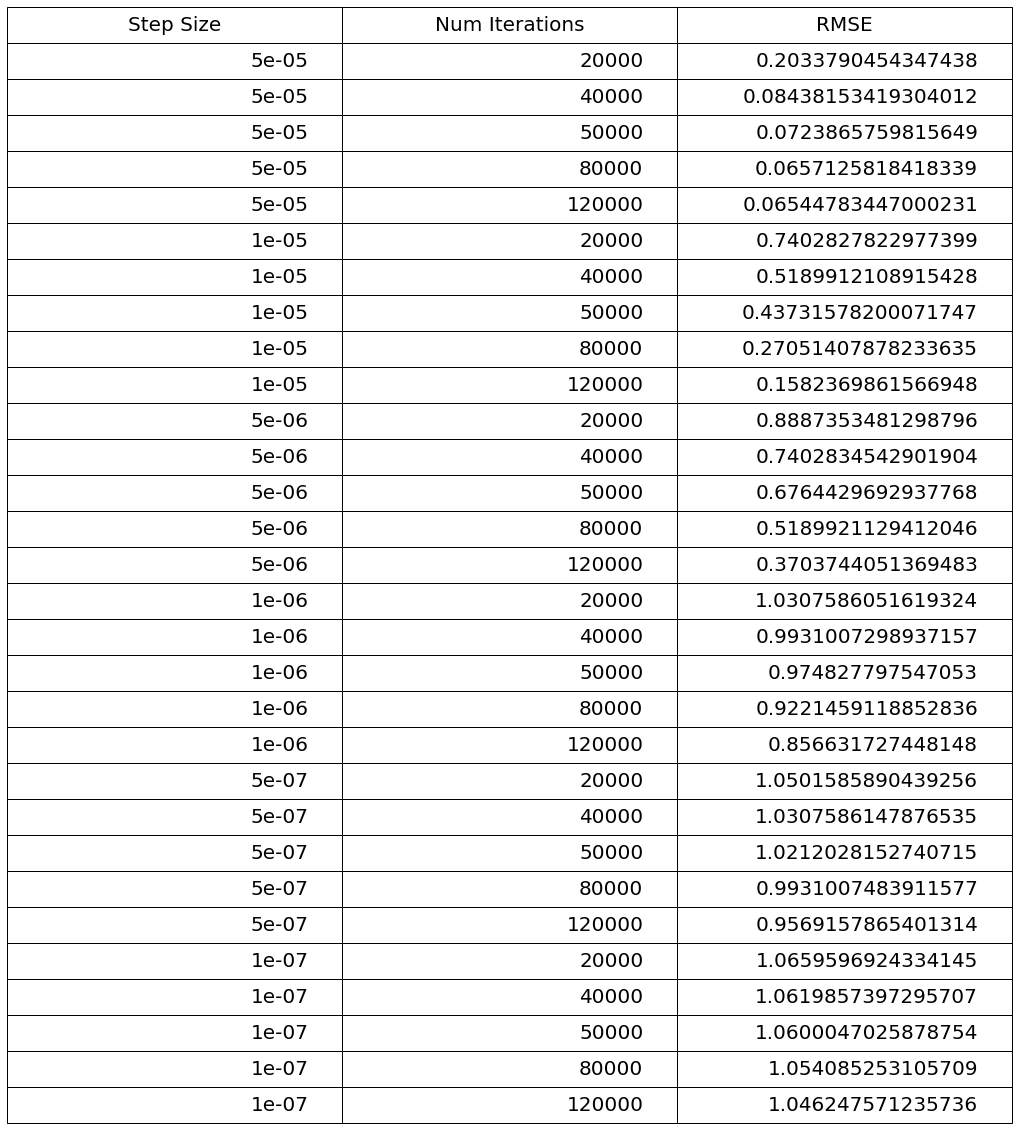

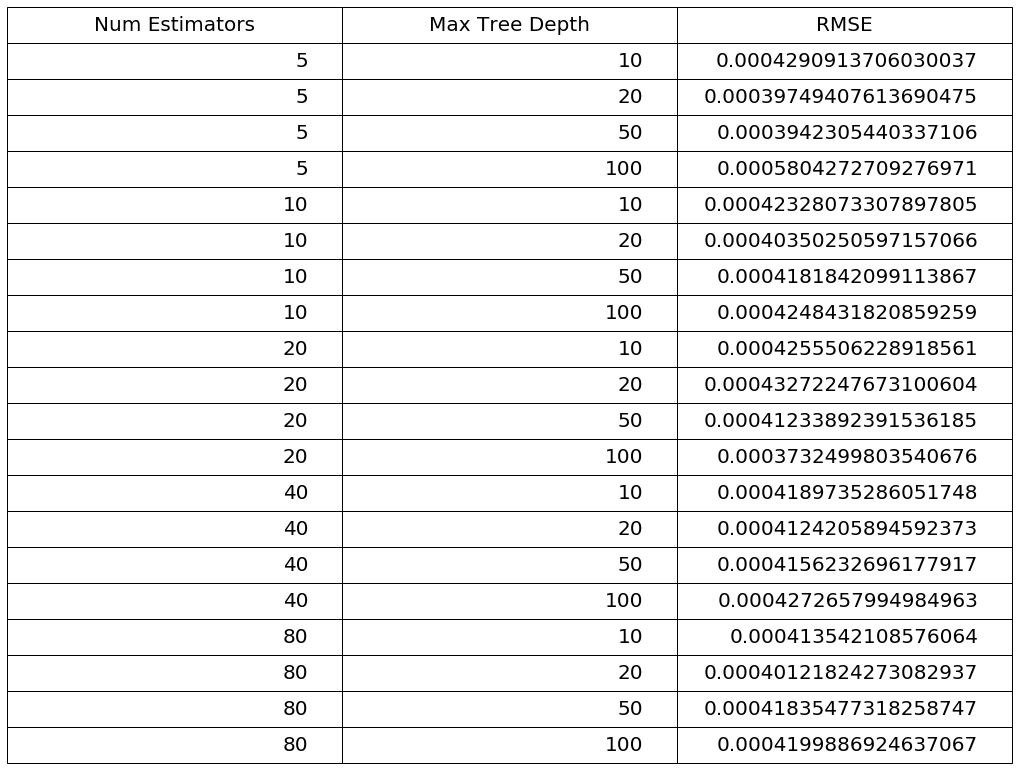

In [14]:
opt_num_samples_gp =  GP.optimal_hyperparams['num_samples']
rmse_gp = GP.eval_values['RMSE']
plot_table([[opt_num_samples_gp], [rmse_gp]], (GP.__class__.__name__, ), ('Optimal - Num Samples', 'RMSE'))

opt_step_size =  LR.optimal_hyperparams['step_size']
opt_num_iterations = LR.optimal_hyperparams['num_iterations']
rmse_lr = LR.eval_values['RMSE']
plot_table([[opt_step_size], [opt_num_iterations], [rmse_lr]], (LR.__class__.__name__, ), ('Optimal - Step Size', 'Optimal - Num Iterations' , 'RMSE'))


opt_estimators =  RF.optimal_hyperparams['num_estimators']
opt_max_tree_depth = RF.optimal_hyperparams['max_tree_depth']
rmse_rf = RF.eval_values['RMSE']
plot_table([[opt_estimators], [opt_max_tree_depth], [rmse_rf]], (RF.__class__.__name__, ), 
           ('Optimal - Num Estimators', 'Optimal - Max Tree Depth', 'RMSE'))

opt_k =  NN.optimal_hyperparams['k']
rmse_nn = NN.eval_values['RMSE']
plot_table([[opt_k], [rmse_nn]], (NN.__class__.__name__, ), ('Optimal - K value', 'RMSE'))

data, column_labels, row_labels = evaluator.get_plottable_analysis(evaluator.results)
plot_table(data, column_labels, row_labels)

plot_data = NN.all_hyperparam_tests
plot_table(plot_data, ('K', 'RMSE'), None)

plot_data = GP.all_hyperparam_tests
plot_table(plot_data, ('Num Samples', 'RMSE'), None)

plot_data = LR.all_hyperparam_tests
plot_table(plot_data, ('Step Size', 'Num Iterations', 'RMSE'), None)

plot_data = RF.all_hyperparam_tests
plot_table(plot_data, ('Num Estimators', 'Max Tree Depth', 'RMSE'), None)


# Sarcos

In [15]:
s_data = data_processor.DataProcessor(0.6, 1000)

In [16]:
s_data.training_features.shape

(600, 21)

In [17]:
data_for_regressors = (s_data.training_features, s_data.training_labels, s_data.test_features, s_data.test_labels)
LR_S= linear_regression.LinearRegression(*data_for_regressors)
RF_S= regression_forest.RegressionForest(*data_for_regressors, opt_estimators, opt_max_tree_depth)
NN_S= nearest_neighbour.NearestNeighbour(*data_for_regressors, opt_k)
GP_S = gaussian_process.GaussianProcess(*data_for_regressors, opt_num_samples_gp)

In [18]:
s_evaluator = evaluation.Evaluator([GP_S, NN_S, LR_S])

In [19]:
s_evaluator.run_evaluation()

Evaluating: GaussianProcess
Finished Evaluating: GaussianProcess
Evaluating: NearestNeighbour
Finished Evaluating: NearestNeighbour
Evaluating: LinearRegression
Finished Evaluating: LinearRegression


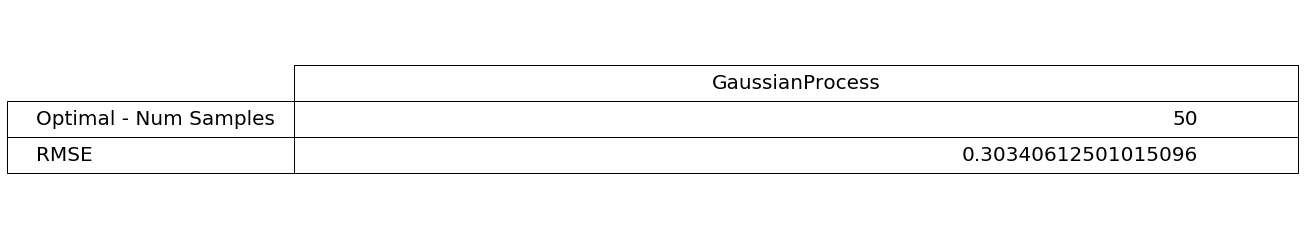

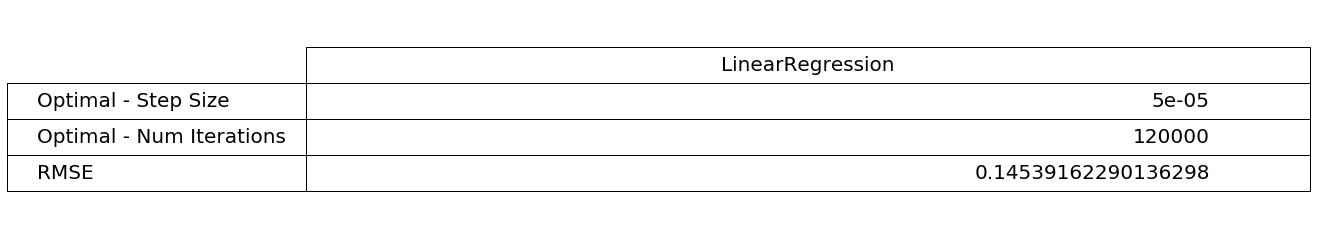

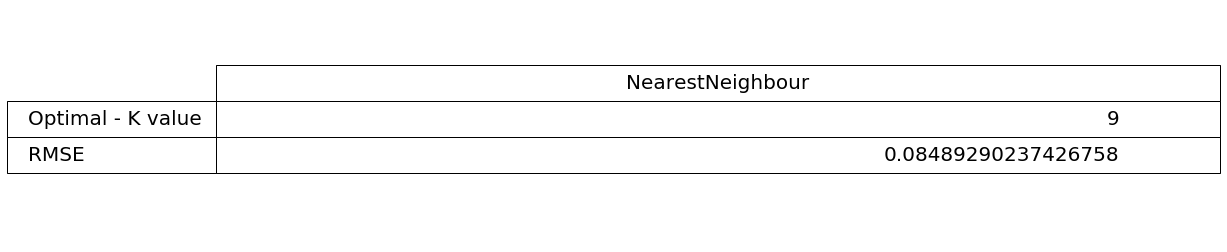

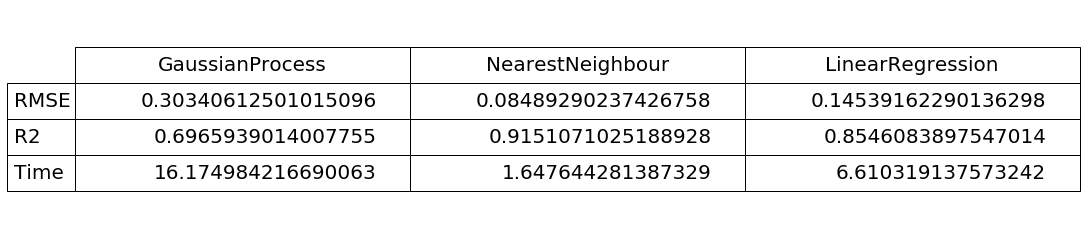

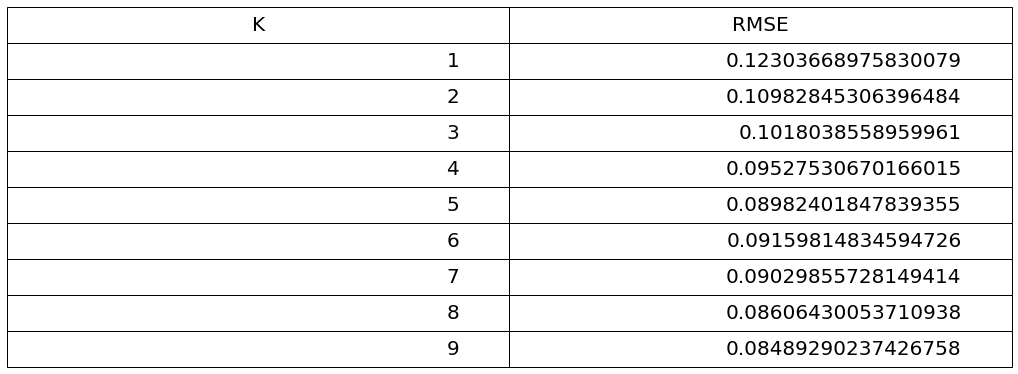

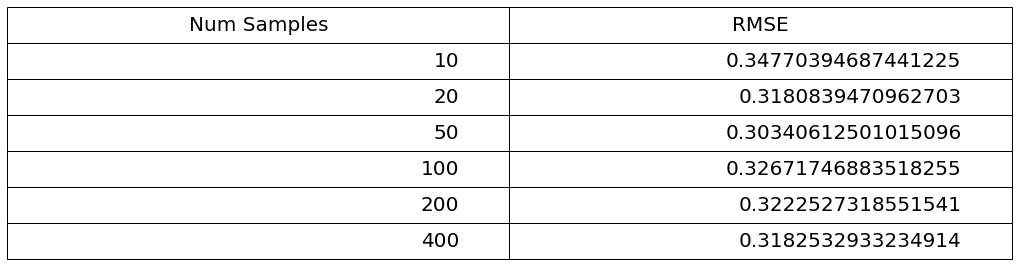

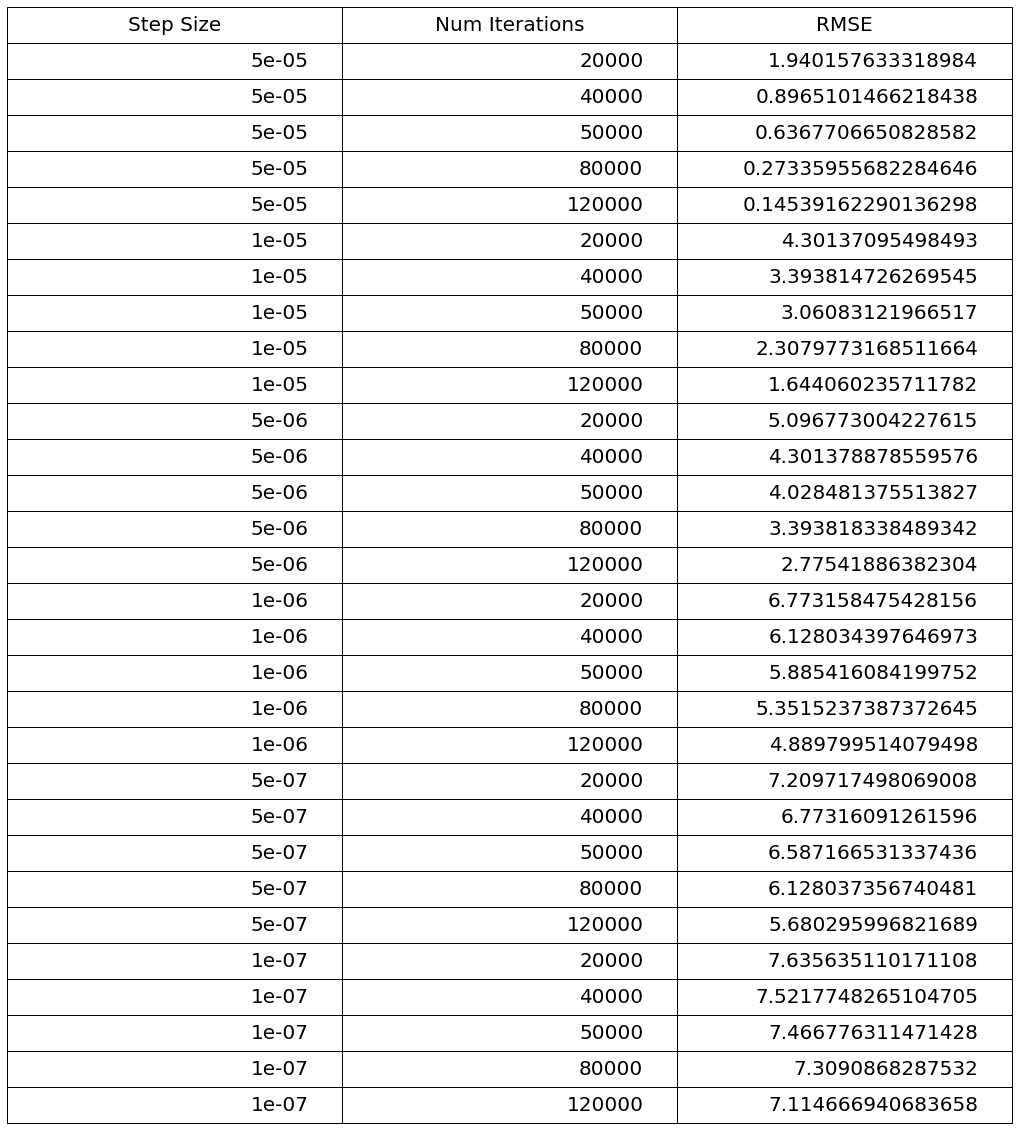

In [21]:
opt_num_samples_gps =  GP_S.optimal_hyperparams['num_samples']
rmse_gps = GP_S.eval_values['RMSE']
plot_table([[opt_num_samples_gps], [rmse_gps]], (GP_S.__class__.__name__, ), ('Optimal - Num Samples', 'RMSE'))

opt_step_size_s =  LR_S.optimal_hyperparams['step_size']
opt_num_iterations_s = LR_S.optimal_hyperparams['num_iterations']
rmse_lr_s = LR_S.eval_values['RMSE']
plot_table([[opt_step_size_s], [opt_num_iterations], [rmse_lr_s]], (LR_S.__class__.__name__, ), ('Optimal - Step Size', 'Optimal - Num Iterations' , 'RMSE'))


# opt_estimators_s =  RF_S.optimal_hyperparams['num_estimators']
# opt_max_tree_depth_s = RF_S.optimal_hyperparams['max_tree_depth']
# rmse_rf_s = RF_S.eval_values['RMSE']
# plot_table([[opt_estimators_s], [opt_max_tree_depth_s], [rmse_rf_s]], (RF_S.__class__.__name__, ), 
#            ('Optimal - Num Estimators', 'Optimal - Max Tree Depth', 'RMSE'))

opt_k_s =  NN_S.optimal_hyperparams['k']
rmse_nn_s = NN_S.eval_values['RMSE']
plot_table([[opt_k_s], [rmse_nn_s]], (NN_S.__class__.__name__, ), ('Optimal - K value', 'RMSE'))

data, column_labels, row_labels = evaluator.get_plottable_analysis(s_evaluator.results)
plot_table(data, column_labels, row_labels)

plot_data = NN_S.all_hyperparam_tests
plot_table(plot_data, ('K', 'RMSE'), None)

plot_data = GP_S.all_hyperparam_tests
plot_table(plot_data, ('Num Samples', 'RMSE'), None)

plot_data = LR_S.all_hyperparam_tests
plot_table(plot_data, ('Step Size', 'Num Iterations', 'RMSE'), None)

# plot_data = RF_S.all_hyperparam_tests
# plot_table(plot_data, ('Num Estimators', 'Max Tree Depth', 'RMSE'), None)



# Update The Hyper Params for testing
GP_S.num_samples = opt_num_samples_gps

LR_S.step_size = opt_step_size_s
LR_S.num_iterations = opt_num_iterations_s


# RF_S.num_estimators = opt_estimators_s
# RF_S.max_tree_depth = opt_max_tree_depth_s

NN_S.k = opt_k_s

In [22]:
s_evaluator.run_predictions()

Predicting: GaussianProcess
Finished Evaluating: GaussianProcess
Predicting: NearestNeighbour
Finished Evaluating: NearestNeighbour
Predicting: LinearRegression
Finished Evaluating: LinearRegression


{   'GaussianProcess': {   'Analysis': {   'R2': 0.6762540616859092,
                                           'RMSE': 0.32374596649556175,
                                           'Time': 13.374968767166138}},
    'LinearRegression': {   'Analysis': {   'R2': 0.8546083897547014,
                                            'RMSE': 0.14539162290136298,
                                            'Time': 6.126820802688599}},
    'NearestNeighbour': {   'Analysis': {   'R2': 0.9151071025188928,
                                            'RMSE': 0.08489290237426758,
                                            'Time': 2.630156993865967}}}


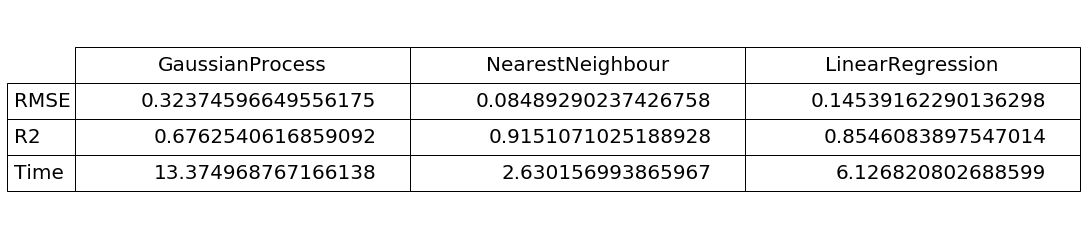

In [23]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(s_evaluator.prediction_results)

data, column_labels, row_labels = s_evaluator.get_plottable_analysis(s_evaluator.prediction_results)
plot_table(data, column_labels, row_labels)
